In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
### Import our Own CTRW Code 
import CTRW_base as CTRW
import CTRW_plot
import CTRW2_mc
import CTRW4
import CTRW4_mc
%matplotlib notebook

In [9]:
alpha = 0.5
D_ends = 2.8e12  # nm^2/s
D_sites = 2.8e16  #nm^2/s
jump_t = 1e-12  # jump time in s
min_t = 0.001  # minimum waiting time in s
run_t = 86400  # simulation run time in s
delay_t = 2.5  # initial delay time in s
int_length = 25 #nm
separation = 500 #nm
int_p = 0.6

2.5378077054332553
[1 0 0 0 0 0 1]
1


<IPython.core.display.Javascript object>


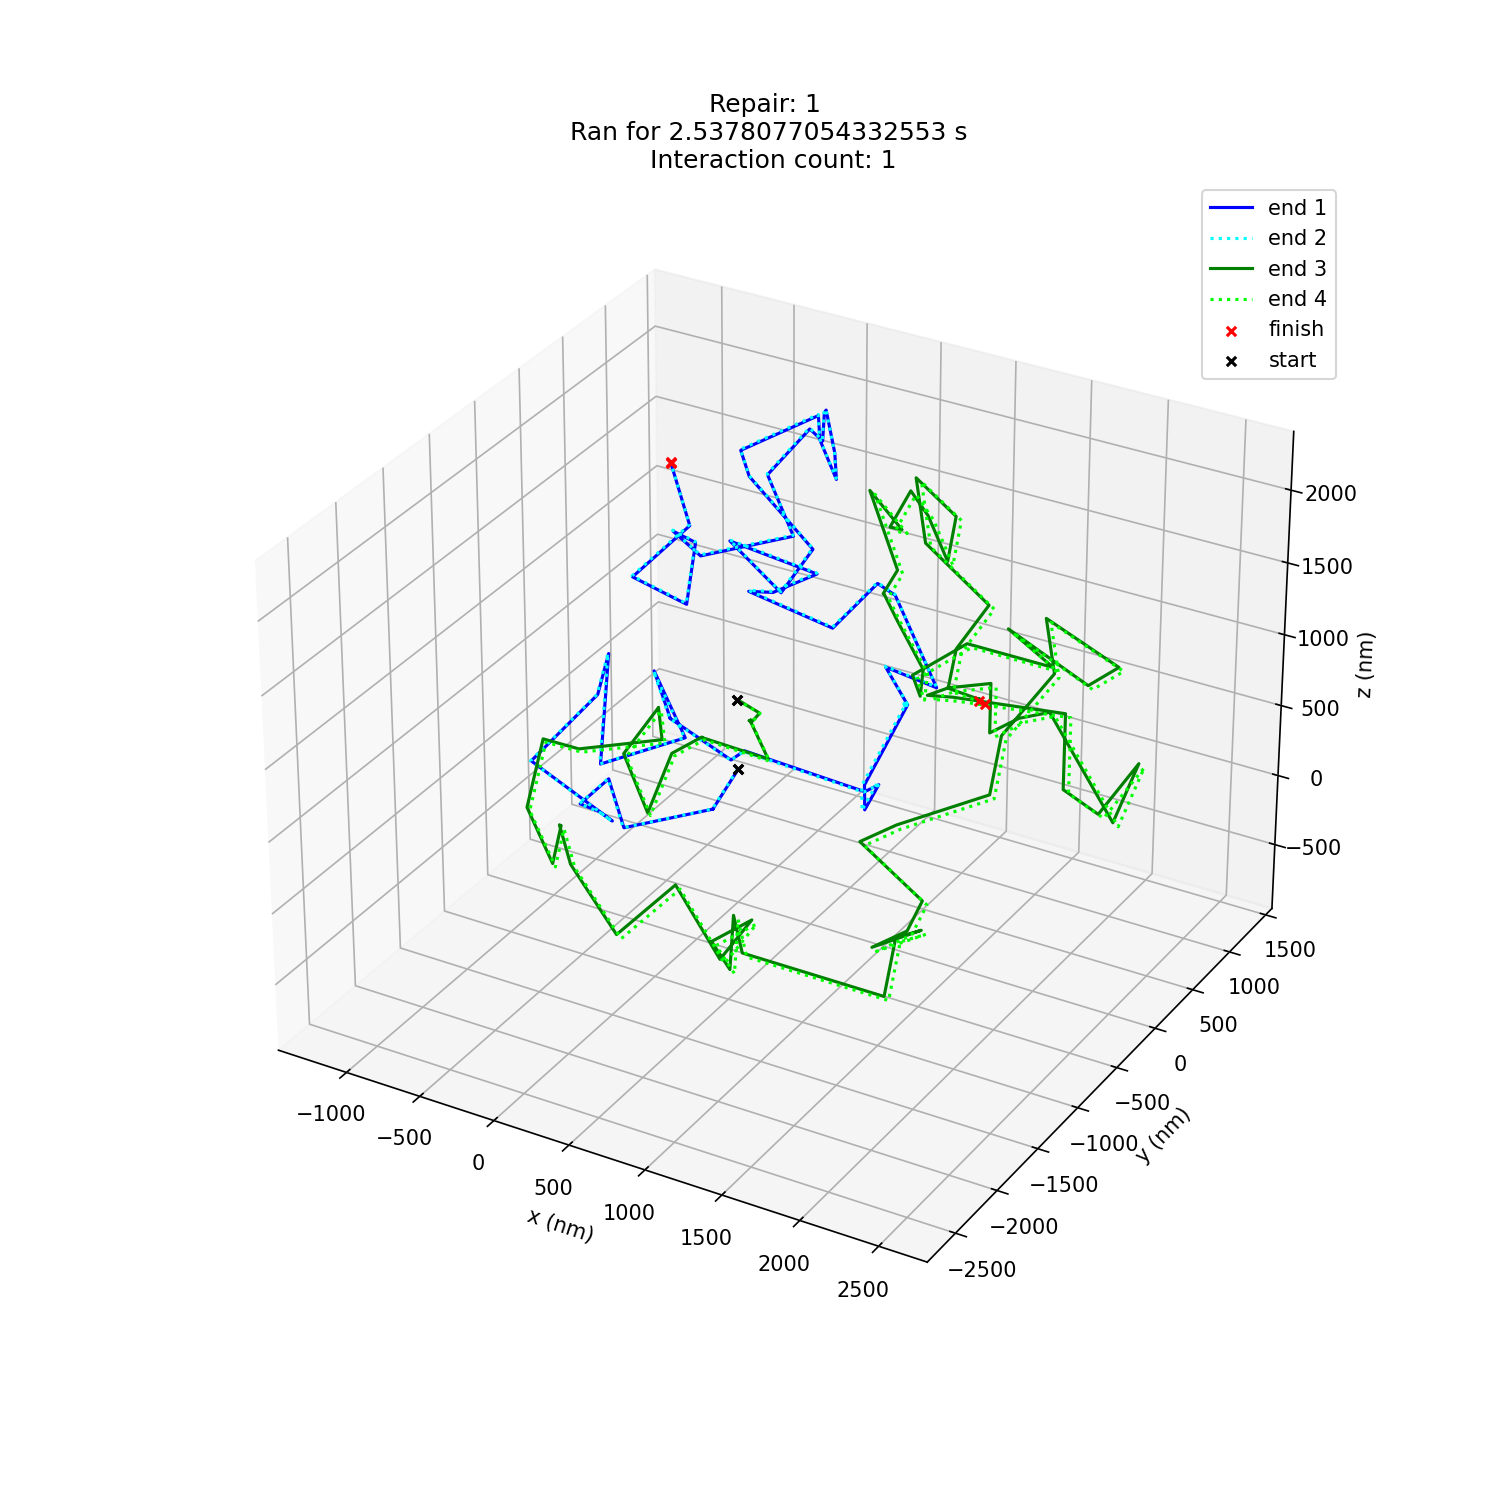

In [10]:
# testing CTRW4 with interaction probability included
int_t, int_arr, df1, df2, df3, df4, repair, sim_clock, int_count = CTRW4.coupled_ctrw([(0,0,0),(0,0,separation)], D_sites,
                                                                                      D_ends, jump_t, run_t, min_t, alpha,
                                                                                      int_length, delay_t, int_p)
print(int_t)
print(int_arr)
print(repair)
CTRW_plot.plot_3d_4ctrw_interaction(int_t, int_arr, df1, df2, df3, df4, repair, sim_clock, int_count)

In [11]:
# testing CTRW4 mc with interaction probability included
CTRW4_mc.ctrw4_interaction_mc(10, [(0,0,0),(0,0,separation)], D_sites, D_ends, jump_t, run_t, min_t, alpha, int_length, 
                              delay_t, int_p)

,mc_step,D_sites,D_ends,int_count,i12,i13,i14,i23,i24,i34,repair,repair_t
0,0.0,2.800000e+16,2.800000e+12,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.653281
1,1.0,2.800000e+16,2.800000e+12,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.335606
2,2.0,2.800000e+16,2.800000e+12,4.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.580201
3,3.0,2.800000e+16,2.800000e+12,4.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,27.258346
4,4.0,2.800000e+16,2.800000e+12,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.177678
5,5.0,2.800000e+16,2.800000e+12,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2337.070791
6,6.0,2.800000e+16,2.800000e+12,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.847674
7,7.0,2.800000e+16,2.800000e+12,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.523243
8,8.0,2.800000e+16,2.800000e+12,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.521137
9,9.0,2.800000e+16,2.800000e+12,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.547883


In [12]:
alpha = 0.5
#D_ends = 2.8e14  # nm^2/s
#D_sites = 2.8e15  #nm^2/s
jump_t = 1e-12  # jump time in s
min_t = 0.001  # minimum waiting time in s
run_t = 86400  # simulation run time in s
delay_t = 2.5  # initial delay time in s
int_length = 25 #nm
separation = 500 #nm

D_site_vals = 2.8*np.logspace(10,17,num=8)
D_end_vals = 2.8*np.logspace(13,14,num=8)

D_end_vals

array([2.80000000e+13, 3.89058738e+13, 5.40595364e+13, 7.51154823e+13,
       1.04372624e+14, 1.45025291e+14, 2.01511988e+14, 2.80000000e+14])

In [8]:
position = [(0,0,0),(0,0,separation)]
repair_df_De_Ds = CTRW4_mc.ctrw4_De_Ds_mc(1,100, position, D_site_vals, D_end_vals, jump_t,
                                          run_t, min_t, alpha, int_length, delay_t, int_p)

64
----------------
0
28000000000000.0 28000000000.0
1
28000000000000.0 280000000000.0


KeyboardInterrupt: 

In [ ]:
#repair_df_De_Ds.to_csv('De_13_14_Ds_10_17_m8_r100_min_t.csv')
#De_7_14_Ds_7_14_m8_r10_min_t = pd.read_csv('De_7_14_Ds_7_14_m8_r10_min_t.csv')
#CTRW_plot.plot_De_and_Ds_subplots(De_7_14_Ds_7_14_m8_r10_min_t,plot_dim_1=2,plot_dim_2=4)

In [ ]:
repair_df_De_Ds = pd.read_csv('De_13_14_Ds_10_17_m8_r100_min_t.csv')

In [ ]:
CTRW_plot.plot_De_and_Ds_subplots(repair_df_De_Ds,plot_dim_1=2,plot_dim_2=4)

In [ ]:
CTRW_plot.heatmap_repair_misrepair_subplots(repair_df_De_Ds,8,8,misrep_multiplier=10,
                                            extent_list=[2.8e10,2.8e17,2.8e14,2.8e13])

In [ ]:
# CTRW_plot.heatmap_repair_misrepair_subplots(repair_df_De_Ds,8,8,misrep_multiplier=1,
#                                                extent_list=[2.8e7,2.8e14,2.8e7,2.8e14])
# repair_df_De_Ds.to_csv('De_7_14_Ds_7_14_m8_r10_min_t.csv')
# De_7_14_Ds_7_14_m8_r10_min_t = pd.read_csv('De_7_14_Ds_7_14_m8_r10_min_t.csv')
# CTRW_plot.plot_De_and_Ds_subplots(De_7_14_Ds_7_14_m8_r10_min_t,plot_dim_1=2,plot_dim_2=4)